# 준홍 kaggle 2번째 코드  

## 참고코드

https://www.kaggle.com/code/shaswata18/bankruptcy-detection-97-accuracy

### kick point  
- Outliers (use Histogram, Boxplot)
- Scaling
- SMOTE
- ROC curve(with cutoff)
- SVM(Distance Based model)
- Feature Importance

# A. Pre-processing 

# Workflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.options.display.max_columns=100
pd.options.display.max_rows=100
pd.set_option('display.float_format','{:.2f}'.format)

### 1.1 Read - head  - shape
- We have total 6819 records from 96 columns in the dataset,of which:
    - 1 Target (Bankrupt?)
    - 95 features

In [4]:
data = pd.read_csv("/kaggle/input/company-bankruptcy-prediction/data.csv")
print(data.shape)
data.head(3)

(6819, 96)


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.37,0.42,0.41,0.60,0.60,1.00,0.80,0.81,0.30,0.78,0.00,0.00,0.46,0.00,0.00,0.15,0.15,0.15,0.17,0.31,0.02,0.10,0.14,0.02,0.85,0.69,0.69,0.22,4980000000.00,0.00,0.26,0.36,0.00,0.00,0.63,0.02,0.21,0.79,0.01,0.39,0.01,0.10,0.14,0.40,0.09,0.00,0.00,0.00,0.00,0.03,0.03,0.39,0.04,0.67,0.17,0.19,0.00,0.00,0.00,0.15,0.33,0.28,0.00,0.68,0.72,0.34,0.03,0.90,0.00,0.06,701000000.00,6550000000.00,0.59,458000000.00,0.67,0.42,0.68,0.34,0.13,0.64,0.46,0.52,0.31,0.12,0,0.72,0.01,0.62,0.60,0.83,0.29,0.03,0.56,1,0.02
1,1,0.46,0.54,0.52,0.61,0.61,1.00,0.80,0.81,0.30,0.78,0.00,0.00,0.46,0.00,0.00,0.18,0.18,0.18,0.21,0.32,0.02,0.09,0.17,0.02,0.85,0.69,0.69,0.22,6110000000.00,0.00,0.26,0.38,0.01,0.00,0.64,0.01,0.17,0.83,0.01,0.38,0.01,0.09,0.17,0.40,0.06,0.00,0.00,9360000000.00,719000000.00,0.03,0.01,0.39,0.01,0.75,0.13,0.18,0.01,0.00,0.00,0.06,0.34,0.29,0.01,0.31,0.73,0.33,0.02,0.93,0.00,0.03,0.00,7700000000.00,0.59,2490000000.00,0.67,0.47,0.31,0.33,0.12,0.64,0.46,0.57,0.31,0.05,0,0.80,0.01,0.62,0.61,0.84,0.28,0.26,0.57,1,0.02
2,1,0.43,0.50,0.47,0.60,0.60,1.00,0.80,0.81,0.30,0.78,0.00,25500000.00,0.46,0.00,0.00,0.18,0.18,0.19,0.18,0.31,0.01,0.09,0.14,0.02,0.85,0.69,0.69,0.22,7280000000.00,0.00,0.26,0.37,0.01,0.01,0.63,0.02,0.21,0.79,0.01,0.38,0.01,0.09,0.15,0.41,0.01,0.00,0.00,65000000.00,2650000000.00,0.01,0.03,0.38,0.14,0.83,0.3

### 1.2 Info , describe
- All features are numeric(숫자)
- one features(변수) has 0 variance(분산) that is constant throughout
- major features are in the range of 0-1(0-1범위 존재)
- there are outlier(이상치) infected features

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [6]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00,6819.00
mean,0.03,0.51,0.56,0.55,0.61,0.61,1.00,0.80,0.81,0.30,0.78,1995347312.80,1950427306.06,0.47,16448012.91,0.12,0.19,0.19,0.19,0.23,0.32,1328640.60,0.11,0.18,0.02,0.85,0.69,0.69,0.22,5508096595.25,1566212.06,0.26,0.38,403284.95,8376594.82,0.63,4416336.71,0.11,0.89,0.01,0.37,0.01,0.11,0.18,0.40,0.14,12789705.24,9826220.86,2149106056.61,1008595981.82,0.04,2325854.27,0.40,11255785.32,0.81,0.40,0.52,0.12,3592902.20,37159994.15,0.09,0.35,0.28,55806804.53,0.76,0.74,0.33,54160038.14,0.93,0.00,0.03,1195855763.31,2163735272.03,0.59,2471976967.44,0.67,1220120.50,0.

### 2. Sanity Check
#### Column Names:
- Remove leading whitespaces from Column names(공백제거)
- Replace " " with "_" in columnnames
- Rename Target column

#### Check constant Columns:
- ***Net Income Flag*** is constant(일정), hence drop
- Rename ***Bankrupt?  -> Bankrupt***

#### Check Duplicates
 - No duplicated values(중복 없음)

#### Check Missing Values
- No missing values(결측값 없음)

In [7]:
print("Column names before renaming","\n", data.columns[:5],"\n")
data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace(" " ,"_")
data.rename(columns = {'Bankrupt?' :'Bankrupt' },inplace=True)
print("Column names after renaming","\n",data.columns[:5])

Column names before renaming 
 Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin'],
      dtype='object') 

Column names after renaming 
 Index(['Bankrupt', 'ROA(C)_before_interest_and_depreciation_before_interest',
       'ROA(A)_before_interest_and_%_after_tax',
       'ROA(B)_before_interest_and_depreciation_after_tax',
       'Operating_Gross_Margin'],
      dtype='object')


In [8]:
data.drop(['Net_Income_Flag'],axis=1,inplace=True) ## drop constant columns

In [9]:
data.duplicated(keep=False).sum()  ## no duplicates

0

In [10]:
data.isnull().values.sum() # check missing values

0

### 3.1 Target Class distribution
- Target is heavily imballanced (불균형 심함)
- Bankruptcy Rate is around 3.2%

In [11]:
df1 = pd.DataFrame(data.Bankrupt.value_counts())
df2 = pd.DataFrame(100*data.Bankrupt.value_counts(normalize=True).astype(float))
tab = df1.merge(df2,left_index=True,right_index=True).rename(columns = {"Bankrupt_x" : "Count" , "Bankrupt_y" : "Percentage"})
print(tab)

   Count  Percentage
0   6599       96.77
1    220        3.23


([<matplotlib.patches.Wedge at 0x7fb31cb6d9d0>,
 [Text(-1.0943545992823505, 0.11130144217199622, '0'),
  Text(1.094354596677152, -0.11130146778721411, '1')])

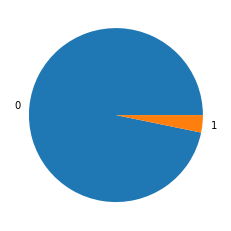

In [12]:
plt.pie(tab['Count'], labels= [0,1])

### 3.2  Outliers Handling
- First separate all **94** features into two groups
    - _fraction-only_ features (i.e. features having values in [0,1]) / 분수 o
    - _other than fraction-only_ features / 분수 x

- **70** features are _fraction-only_ features where as **24** are _other than fraction-only_ features.  
**70** -> 분수 o , **24** -> 분수 x

- 이상값은 주로 이러한 24개의 _"분수 전용 이외의"_ 변수에서 **존재**합니다.  

- 이상치 특성을 탐색하기 위해 이러한 24개 특성의 분포는 다음을 사용하여 얻습니다.
    - Histogram
    - Boxplot

In [13]:
## fn to separate only-fractional & other columns
def get_fraction_valued_columns(df):
    my_columns  = []
    for col in df.columns:
        if (data[col].max()<=1) & (data[col].min() >= 0):
            my_columns.append(col)
    return(my_columns)

fractional_columns = get_fraction_valued_columns(df=data.drop(['Bankrupt'],axis=1))
non_fraction_columns = data.drop(['Bankrupt'],axis=1).columns.difference(fractional_columns)
print("# Fraction-only Columns",len(fractional_columns),"\t","# Other than Fraction-only Columns", len(non_fraction_columns))

# Fraction-only Columns 70 	 # Other than Fraction-only Columns 24


### Other than fration-only features : Histogram

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


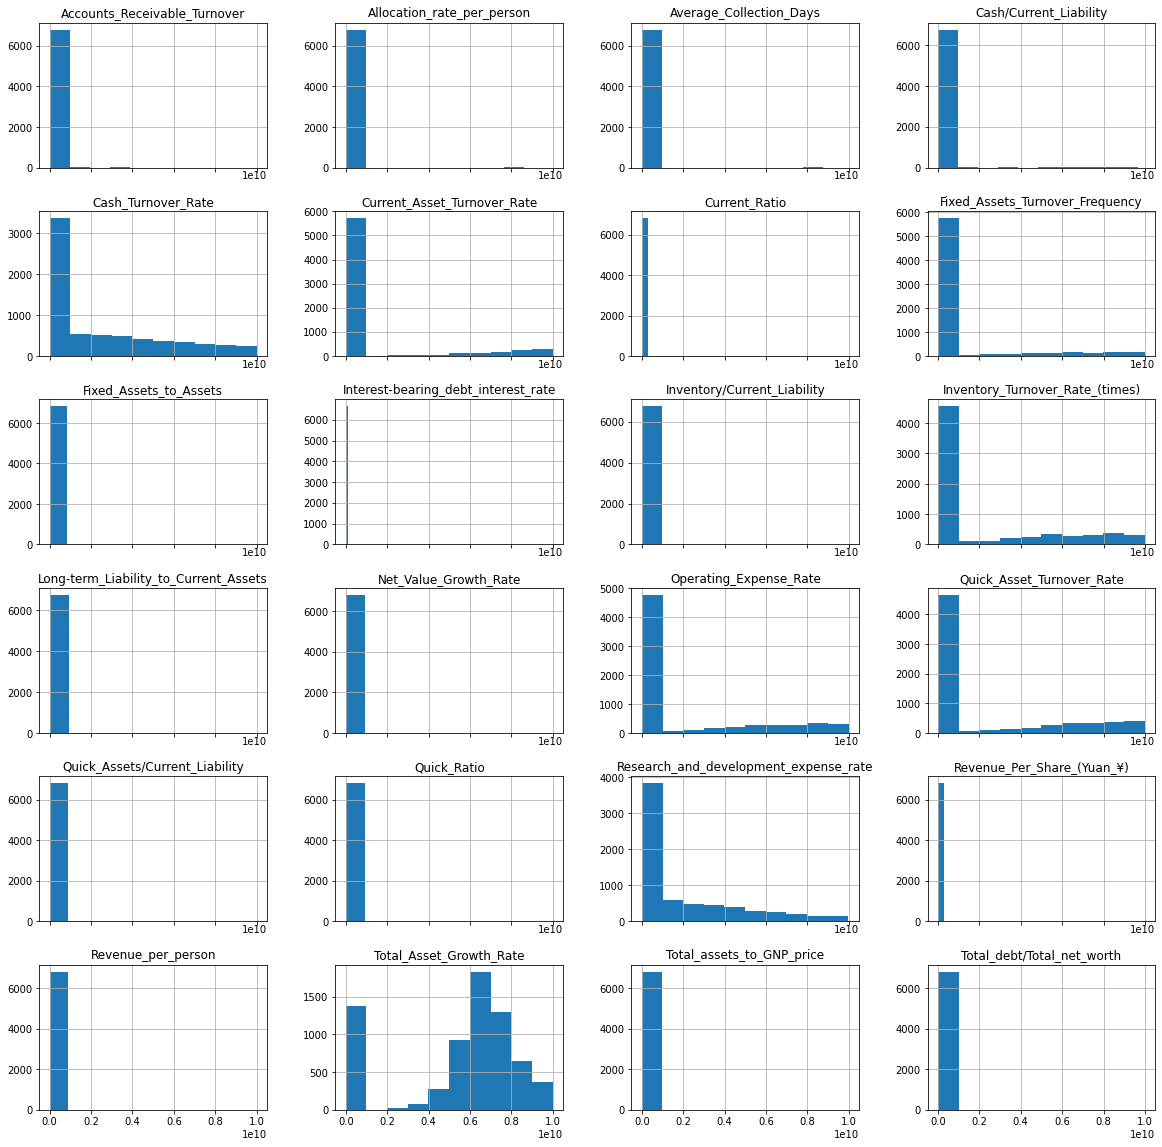

In [14]:
data[non_fraction_columns].hist(figsize= (20,20),sharex=True,layout= (6,4))
plt.show()

 ### Other than fration-only features :  Boxplot

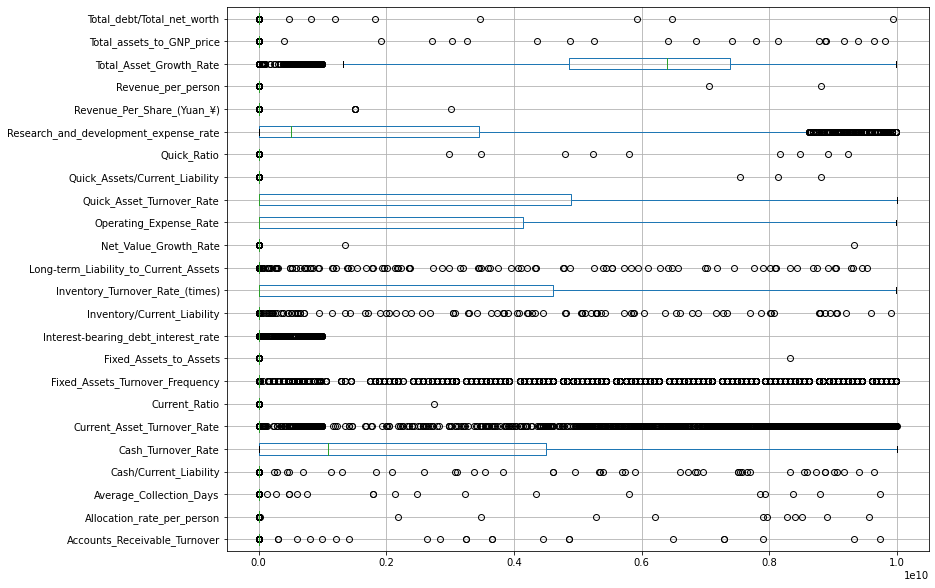

In [15]:
data[non_fraction_columns].boxplot(vert=False,figsize= (15,10))
plt.subplots_adjust(left=0.25)
plt.show()

### __Observations__
- Major values are concentrated around starting ranges yet there are very high valued records.
- Some features show outliers in top 1% values only.Few of such features are:
    - Total_debt/Total_net_worth 
    - Revenue_per_person
    - Net_Value_Growth_Rate
    - Revenue_Per_Share etc

2. There are some features that have significant number of higher values, like:
    - Current_Asset_Turnover_Rate
    - Cash_Turnover_Rate

- **These features may potentially seem to be outliers but not be practically so.Hence outliers here need to be handled more cautiously,simply eliminating records lying above some cutoff cant be applied for all throughout**. 

- We Need to have a rule: 

#### **Rule** :
- Only __other than fraction-only__ features are considered for outlier inspection
- Among them those meeting following conditions I decide to term them as outliers infected:
   - 100th percentile value is atleast 100 times greater than 99th percentile.
   - There are 10 or less records for 100th percentile.
- For the features satisfying above outlier condition we replace them  as x-> log(1+x)
- __N.B: This is just a rule of thumb I made based on the experience while playing with the data.__ 


### __관찰__
- 주요 값은 시작 범위에 집중되어 있지만 매우 높은 값의 기록이 있습니다.
- 일부 기능은 상위 1% 값의 이상값만 표시합니다. 이러한 기능 중 일부는 다음과 같습니다.
    - Total_debt/Total_net_worth 
    - Revenue_per_person
    - Net_Value_Growth_Rate
    - Revenue_Per_Share 
    - etc..(등등)

2. 다음과 같이 상당히 높은 값을 갖는 일부 기능이 있습니다.
    - Current_Asset_Turnover_Rate
    - Cash_Turnover_Rate

- **이러한 기능은 잠재적으로 이상값으로 보일 수 있지만 실제로는 그렇지 않습니다. 따라서 여기서 이상값은 더 조심스럽게 처리해야 하며, 단순히 일부 cutoff(컷옵) above(이상인, 위에 있는) 레코드를 제거하는 것만으로는 전체에 적용할 수 없습니다**. 

- 규칙이 필요합니다. 

#### **규칙** :
- __분수 전용 이외의__ 변수만 이상값 검사에 고려됩니다.
- 그 중에서 다음 조건을 충족하는 사람들을 감염된 이상치로 정의하기로 결정했습니다.
   - 100번째 백분위수 값은 99번째 백분위수보다 최소한 100배 더 큽니다.
   - 100번째 백분위수에 대한 레코드가 10개 이하입니다.
- 위의 이상치 조건을 만족하는 특징에 대해 x-> log(1+x)로 대체합니다.
- __주의: 이것은 제가 데이터를 가지고 놀면서 경험을 바탕으로 만든 경험 법칙입니다.__

In [16]:
## Outlier handling techniques
log_transformed_cols = []
for col in data[non_fraction_columns].columns:
    if (data[col].quantile(1) >= 100* data[col].quantile(0.99)) |  (sum(data[col] > data[col].quantile(0.99)) <= 10):
        data[col] = np.log1p(data[col])
        log_transformed_cols.append(col)
        
## Change names of log transformed column
log_names = "log_" + data[log_transformed_cols].columns
data.rename(columns={data[log_transformed_cols].columns[i]: log_names[i] for i in range(len(log_names))}, inplace = True)
#data.columns

The following features are log transformed after they fulfill outlier detection condition. 

 ['Accounts_Receivable_Turnover', 'Allocation_rate_per_person', 'Average_Collection_Days', 'Cash/Current_Liability', 'Current_Ratio', 'Fixed_Assets_to_Assets', 'Net_Value_Growth_Rate', 'Quick_Assets/Current_Liability', 'Quick_Ratio', 'Revenue_Per_Share_(Yuan_¥)', 'Revenue_per_person', 'Total_assets_to_GNP_price', 'Total_debt/Total_net_worth']


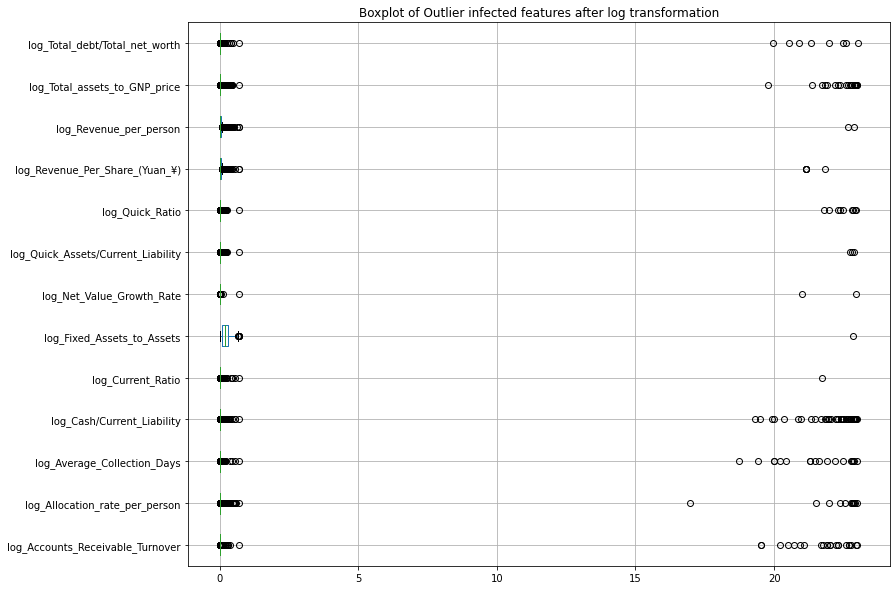

In [17]:
print("The following features are log transformed after they fulfill outlier detection condition.","\n\n",log_transformed_cols)
data[log_names].boxplot(vert=False,figsize= (15,10))
plt.subplots_adjust(left=0.25)
plt.title("Boxplot of Outlier infected features after log transformation")
plt.show()

# B. Modelling

In [18]:
X = data.drop(["Bankrupt"],axis=1)
y = data.Bankrupt

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2 , mutual_info_classif 
from imblearn.over_sampling import SMOTE 

## 1.1 Feature Scaling
- Scale all features in order to have zero mean and unit variance  
평균 및 단위 분산이 0이 되도록 모든 기능의 크기를 조정합니다.  

In [20]:
X_scaled = pd.DataFrame(StandardScaler(copy=False).fit_transform(X))
X_scaled.columns = X.columns

##  1.2 Feature Selection
- In order to select features to be fed into the predictive model mutual information is useed.
- Features with positive mutual information are retained for final model.

- 예측 모델에 입력할 변수를 선택하기 위해 상호 정보가 사용됩니다.
- 긍정적인 상호 정보를 갖는 변수는 최종 모델에 유지됩니다.

In [21]:
mutual_info = mutual_info_classif(X= X_scaled,y= y)  # 모든 예측 변수에 대한 상호 정보 얻기
pruned_features = X.columns[np.where(mutual_info>0)]  # mi >0인 경우에만 기능 유지
X_scaled_pruned = X_scaled[pruned_features]

## 1.3 Target class Imballance : SMOTE
- only 3.2% of the companies has Bankrupted in the dataset,making it imballanced target class probelm.
- Hence positive target class( Bankrupt=1) is under-represented.This could be challenging as lack of positive class in the train data may lead machine learning model to have poor performance in terms of detecting positive class in the unseen data.
- SMOTE(Synthetic Minority Oversampling Techniwque) proposed by Chawla et al 2002, is a well applied technique to handle such scenerio.
- SMOTE actually creates as many synthetic examples for minority class as are requirred so that finally two target class are well represented. It does so by synthesising samples that are close to the feature space ,for the minority target class.
More about [SMOTE](http://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)

- 데이터 세트에서 회사의 3.2%만이 파산하여 대상 클래스 문제의 불균형을 초래합니다.
- 따라서 긍정적인 대상 클래스(파산=1)는 과소 표현됩니다. train 데이터에 긍정적인 클래스가 없으면 기계 학습 모델이 보이지 않는 데이터에서 긍정적인 클래스를 감지하는 측면에서 성능이 저하될 수 있으므로 이는 어려울 수 있습니다.
- Chawla et al 2002가 제안한 SMOTE(Synthetic Minority Oversampling Techniwque)는 이러한 장면을 처리하기 위해 잘 적용되는 기술입니다.
- SMOTE는 실제로 두 개의 대상 클래스가 잘 표현되도록 소수 클래스에 대해 필요한 만큼의 합성 예제를 생성합니다. 소수 대상 클래스에 대해 기능 공간에 가까운 샘플을 합성함으로써 이를 수행합니다.
[SMOTE](http://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)에 대해 자세히 알아보기

In [22]:
sm = SMOTE(random_state=123)
X_sm , y_sm = sm.fit_resample(X_scaled_pruned,y)

print(f'''Shape of X before SMOTE:{X_scaled_pruned.shape}
Shape of X after SMOTE:{X_sm.shape}''',"\n\n")

print(f'''Target Class distributuion before SMOTE:\n{y.value_counts(normalize=True)}
Target Class distributuion after SMOTE :\n{y_sm.value_counts(normalize=True)}''')

Shape of X before SMOTE:(6819, 89)
Shape of X after SMOTE:(13198, 89) 


Target Class distributuion before SMOTE:
0   0.97
1   0.03
Name: Bankrupt, dtype: float64
Target Class distributuion after SMOTE :
0   0.50
1   0.50
Name: Bankrupt, dtype: float64


## 2.1 Logistic Regression
- Will be using logistic regression as our benchmark model.
- Combination of L1 & L2 regularization(Elasticnet)is applied.
- With and Without Using SMOTE

- 벤치마크 모델로 로지스틱 회귀를 사용할 예정입니다.  
- L1 & L2 정규화(Elasticnet)의 조합이 적용됩니다.  
- SMOTE 사용 유무에 관계없이  

In [23]:
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn import metrics

In [24]:
x_train , x_test , y_train ,y_test = train_test_split(X_sm,y_sm,test_size= 0.33)

In [25]:
from sklearn.linear_model import LogisticRegression
lr_fit = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=0.5,max_iter=10000).fit(x_train,y_train)

### 성능 지표: (Cutoff independent)

In [26]:
lr_pred = lr_fit.predict_proba(x_test)  ## predicted probabilities
lr_pred = lr_pred[:,1]  #prob(Bankrupt=0)

lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test,  lr_pred)  #fpr, tpr for AUC
lr_auc = metrics.roc_auc_score(y_test,lr_pred)   #AUC

## in order to collate FPR, TPR and AUC create a dataframe  
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
result_table.set_index('classifiers', inplace=True)
result_table = result_table.append({'classifiers':"Logistic Regression",
                                        'fpr':lr_fpr, 
                                        'tpr':lr_tpr, 
                                        'auc':lr_auc}, ignore_index=True)

print('Logistic Regression AUC=%.3f' % (lr_auc))

Logistic Regression AUC=0.960


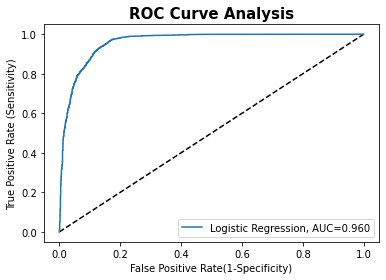

In [27]:
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.plot(lr_fpr,lr_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[0,'classifiers'], result_table.loc[0]['auc']))
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')
plt.show()

### 성능 지표(Cutoff based)

In [28]:
yhat = lr_fit.predict(x_test,)
label = ['Fin.Stable', 'Fin.Unstable']
report = metrics.classification_report(y_test, yhat,target_names=label)

print(report)
print("Confusion Matrix :", "\n" ,metrics.confusion_matrix(y_test,yhat))

              precision    recall  f1-score   support

  Fin.Stable       0.91      0.88      0.90      2178
Fin.Unstable       0.89      0.91      0.90      2178

    accuracy                           0.90      4356
   macro avg       0.90      0.90      0.90      4356
weighted avg       0.90      0.90      0.90      4356

Confusion Matrix : 
 [[1924  254]
 [ 197 1981]]


## 2.2 Support Vector Classifier

In [29]:
from sklearn import svm

In [30]:
svc_fit = svm.SVC(C=1,kernel= 'rbf',degree=3,probability=True).fit(x_train,y_train)

### 성능 지표: (Cutoff independent)

In [31]:
svc_pred = svc_fit.predict_proba(x_test)
svc_pred = svc_pred[:,1]

svc_fpr, svc_tpr, _ = metrics.roc_curve(y_test,  svc_pred)
svc_auc = metrics.roc_auc_score(y_test,svc_pred)

result_table = result_table.append({'classifiers':"Support Vector Classifier",
                                        'fpr':svc_fpr, 
                                        'tpr':svc_tpr, 
                                        'auc':svc_auc}, ignore_index=True)

print('Support Vector Classifier AUC =%.3f' % (svc_auc))

Support Vector Classifier AUC =0.973


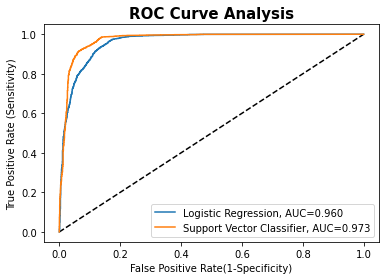

In [32]:
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.plot(lr_fpr,lr_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[0,'classifiers'], result_table.loc[0]['auc']))
plt.plot(svc_fpr,svc_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[1,'classifiers'], result_table.loc[1]['auc']))
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')
plt.show()

### 성능 지표(Cutoff based)

In [33]:
yhat = svc_fit.predict(x_test)
label = ['Fin.Stable', 'Fin.Unstable']
report = metrics.classification_report(y_test, yhat,target_names=label)

print(report)
print("Confusion Matrix :", "\n" ,metrics.confusion_matrix(y_test,yhat))

              precision    recall  f1-score   support

  Fin.Stable       0.95      0.89      0.92      2178
Fin.Unstable       0.89      0.96      0.92      2178

    accuracy                           0.92      4356
   macro avg       0.92      0.92      0.92      4356
weighted avg       0.92      0.92      0.92      4356

Confusion Matrix : 
 [[1930  248]
 [  95 2083]]


## Tree Based Ensamble Models
- Gradient Boosted Classifier
- Ada Boost Classifiers

In [34]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier

## 2.3.1 Gradient Boosted Classifiers

In [35]:
gbc = GradientBoostingClassifier(learning_rate=0.1,max_depth=2,random_state=123,subsample=0.8,n_estimators=600)
gbc_fit = gbc.fit(x_train,y_train)

###  Performance metrics : (Cutoff Independent )

In [36]:
gbc_pred = gbc_fit.predict_proba(x_test)
gbc_pred = gbc_pred[:,1]

gbc_fpr, gbc_tpr, _ = metrics.roc_curve(y_test,  gbc_pred)
gbc_auc = metrics.roc_auc_score(y_test,gbc_pred)

result_table = result_table.append({'classifiers':"Gradient Boosted Classifier",
                                    'fpr':gbc_fpr, 
                                    'tpr':gbc_tpr, 
                                    'auc':gbc_auc}, ignore_index=True)


print('Gradient Boosted Classifier AUC=%.3f' % (gbc_auc))

Gradient Boosted Classifier AUC=0.996


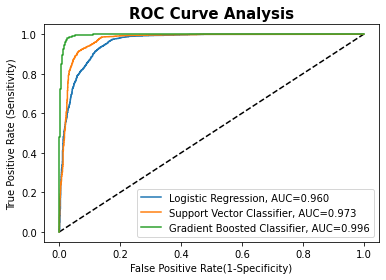

In [37]:
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.plot(lr_fpr,lr_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[0,'classifiers'], result_table.loc[0]['auc']))
plt.plot(svc_fpr,svc_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[1,'classifiers'], result_table.loc[1]['auc']))
plt.plot(gbc_fpr,gbc_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[2,'classifiers'], result_table.loc[2]['auc']))
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')
plt.show()

###  Performance metrics : (Cutoff based )

In [38]:
yhat = gbc_fit.predict(x_test)
label = ['Fin.Stable', 'Fin.Unstable']
report = metrics.classification_report(y_test, yhat,target_names=label)

print(report)
print("Confusion Matrix :", "\n" ,metrics.confusion_matrix(y_test,yhat))

              precision    recall  f1-score   support

  Fin.Stable       0.99      0.96      0.97      2178
Fin.Unstable       0.96      0.99      0.97      2178

    accuracy                           0.97      4356
   macro avg       0.97      0.97      0.97      4356
weighted avg       0.97      0.97      0.97      4356

Confusion Matrix : 
 [[2080   98]
 [  23 2155]]


##  2.3.2 AdaBoost Classifier

In [39]:
abc = AdaBoostClassifier(n_estimators=500,random_state=123,learning_rate=0.3)
abc_fit = abc.fit(x_train,y_train)

###  Performance metrics : (Cutoff Independent )

In [40]:
abc_pred = abc_fit.predict_proba(x_test)
abc_pred = abc_pred[:,1]

abc_fpr, abc_tpr, _ = metrics.roc_curve(y_test,  abc_pred)
abc_auc = metrics.roc_auc_score(y_test,abc_pred)

result_table = result_table.append({'classifiers':"Ada Boosted Classifier",
                                    'fpr':abc_fpr, 
                                    'tpr':abc_tpr, 
                                    'auc':abc_auc}, ignore_index=True)

print('Ada Boosted Classifier AUC=%.3f' % (abc_auc))

Ada Boosted Classifier AUC=0.992


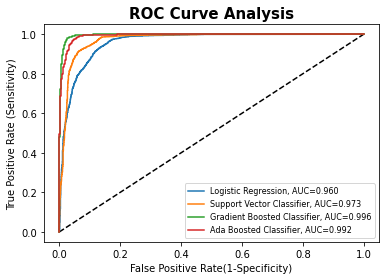

In [41]:
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.plot(lr_fpr,lr_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[0,'classifiers'], result_table.loc[0]['auc']))
plt.plot(svc_fpr,svc_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[1,'classifiers'], result_table.loc[1]['auc']))
plt.plot(gbc_fpr,gbc_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[2,'classifiers'], result_table.loc[2]['auc']))
plt.plot(abc_fpr,abc_tpr ,label="{}, AUC={:.3f}".format(result_table.loc[3,'classifiers'], result_table.loc[3]['auc']))
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':8}, loc='lower right')
plt.show()

###  Performance metrics : (Cutoff Based )

In [42]:
yhat = abc_fit.predict(x_test)
label = ['Fin.Stable', 'Fin.Unstable']
report = metrics.classification_report(y_test, yhat,target_names=label)

print(report)
print("Confusion Matrix :", "\n" ,metrics.confusion_matrix(y_test,yhat))

              precision    recall  f1-score   support

  Fin.Stable       0.98      0.94      0.96      2178
Fin.Unstable       0.94      0.98      0.96      2178

    accuracy                           0.96      4356
   macro avg       0.96      0.96      0.96      4356
weighted avg       0.96      0.96      0.96      4356

Confusion Matrix : 
 [[2053  125]
 [  43 2135]]


## Final Comment : 
- Best Model for the data: Gradient Boosted Tree
- GBC predicts with following score on test dataset
  - 96% accuracy 
  - 99.5% AUC
  - 97% f1 score  

### Feature Importance

<AxesSubplot:xlabel='Importance', ylabel='Features'>

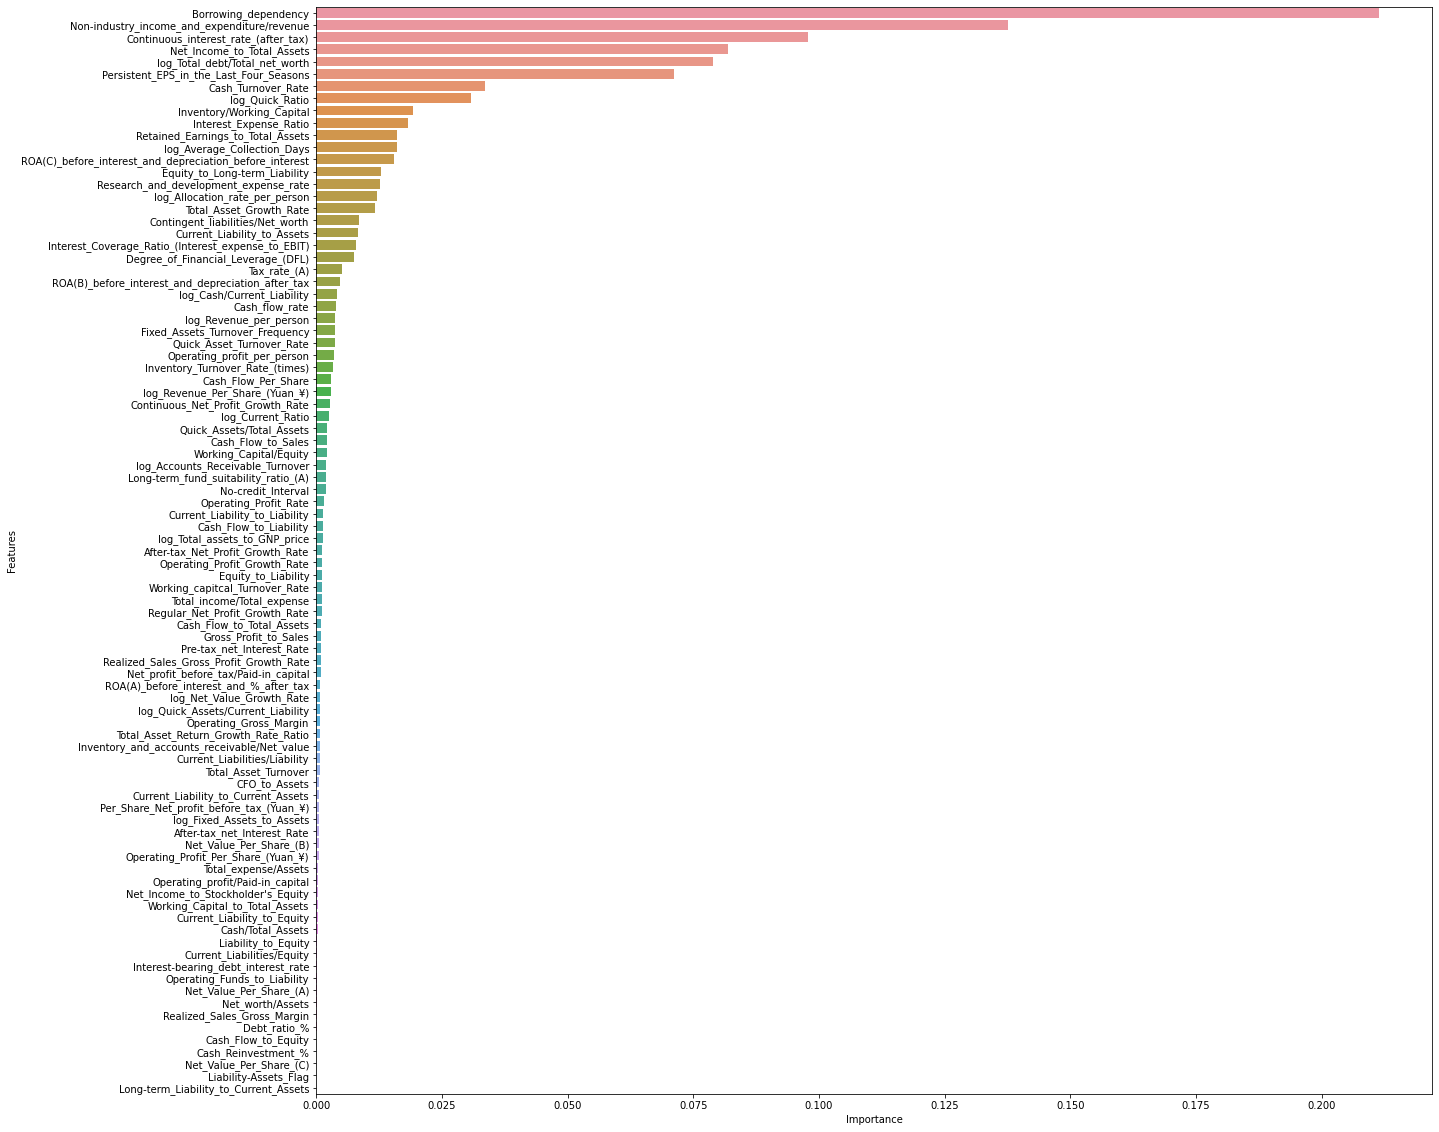

In [43]:
var_imp = pd.concat([pd.DataFrame(X_scaled_pruned.columns),pd.DataFrame(np.transpose(gbc_fit.feature_importances_))],axis=1)
var_imp.columns = ['Features', 'Importance']
var_imp = var_imp.sort_values('Importance',ascending = False)
plt.figure(figsize=(20,20))
sns.barplot(y= 'Features',x= 'Importance',data= var_imp,orient='h')